# Task 2: Visualizing fire scars through false color

In [48]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd 
import xarray as xarray

## 2. Fire perimeter data exploration
Explore the fire perimeter data and write a brief summary of the information you obtained from the preliminary exploration. Your summary should include, at least, the CRS of the data and whether this is projected or geographic.

In [49]:
# Set up display options when looking at data frames
pd.set_option("display.max.columns", None)

## Import the fires

# Establish file path to read in TIGER shapefile
eaton_fp =os.path.join("data", "Eaton_Perimeter_20250121", "Eaton_Perimeter_20250121.shp")
eaton = gpd.read_file(eaton_fp)

# Establish file path to read in TIGER shapefile
palisades_fp = os.path.join("data", "Palisades_Perimeter_20250121", "Palisades_Perimeter_20250121.shp")
palisades = gpd.read_file(palisades_fp)

#### Exploring the Eaton Fire Shapefile

In [50]:
# Check the first few rows 
eaton.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."


In [51]:
# Explore data types, dimensions, and additional attributes
eaton.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes


In [52]:
# Check the projected CRS
print(f"The CRS of the Eaton Fires shapefile is {eaton.crs.name} ({eaton.crs}).")

The CRS of the Eaton Fires shapefile is WGS 84 / Pseudo-Mercator (EPSG:3857).


<Axes: >

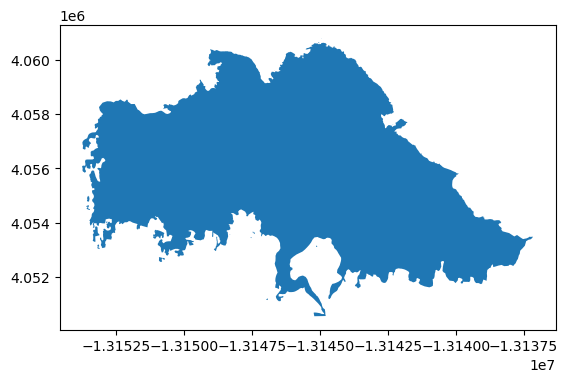

In [92]:
# Visualize Palisades fire extent 
eaton.plot()

#### Exploring the Palisades Fire Shapefile

In [53]:
# Check the first few rows 
palisades.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.580 4033236.320, -13194209..."


In [54]:
# Explore data types, dimensions, and additional attributes
palisades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes


In [59]:
# Check the projected CRS
print(f"The CRS of the Palisades Fires shapefile is {palisades.crs.name} ({palisades.crs}).")

The CRS of the Palisades Fires shapefile is WGS 84 / Pseudo-Mercator (EPSG:3857).


<Axes: >

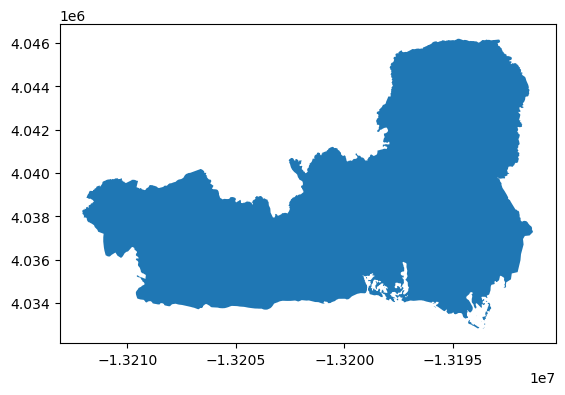

In [91]:
# Visualize Palisades fire extent 
palisades.plot()

## 3. NetCDF data import and exploration
Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables, dimensions, and coordinates.


In [56]:
#conda install -c conda-forge netcdf4

In [57]:
# Read in and open landsat data 
palisades_eaton = xr.open_dataset("data/landsat8-2025-02-23-palisades-eaton.nc")

In [63]:
# Observe variables as well as their attributes and dimensions
palisades_eaton

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

## 4. Restoring geospatial information
Use rio.crs to print what is the CRS of this dataset. Is this a geospatial object?

You may have noticed on section 3 that the geospatial information for this dataset is stored in the variable spatial_ref. Print the CRS by using accesing the spatial_ref.crs_wkt attribute of the dataset.

Recover the geospatial information by using rio.write_crs() and the spatial reference information form part b.

Print the CRS of the updated dataset.


In [105]:
print(f"The landsat geospatial information for the Palisades-Eaton fires includes: {palisades_eaton.x.crs} (longitude) and {palisades_eaton.y.rio.crs} (latitude)")

The landsat geospatial information for the Palisades-Eaton fires includes: EPSG:32611 (longitude) and EPSG:32611 (latitude)


`palisades_eaton` is a geospatial object. 

In [110]:
# need to project
palisades_eaton.rio.crs

In [108]:
#spatial_ref.crs_wkt
palisades_eaton.spatial_ref.crs_wkt()

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

In [113]:
palisades_eaton = palisades_eaton.rio.write_crs(32611, inplace = True)

## 5. True color image
Without creating any new variables:
select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,
convert it to a numpy.array using the to_array() method, and then
use .plot.imshow() to create an RGB image with the data. There will be two warnings, that’s ok.
Adjust the scale used for plotting the bands to get a true color image. HINT: Check the robust parameter. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

To resolve the other warning, identify which bands have nan values. HINT: There are many ways of doing so. One option is to use numpy.isnan().

Use the .fillna() mehtod for xarray.Datasets to substitute the any nan values in the Landsat data for zero.

Create a new true color image that gets plotted without warnings.

In a markdown cell write a brief explanation comparing the ouputs for parts (a) and (e).

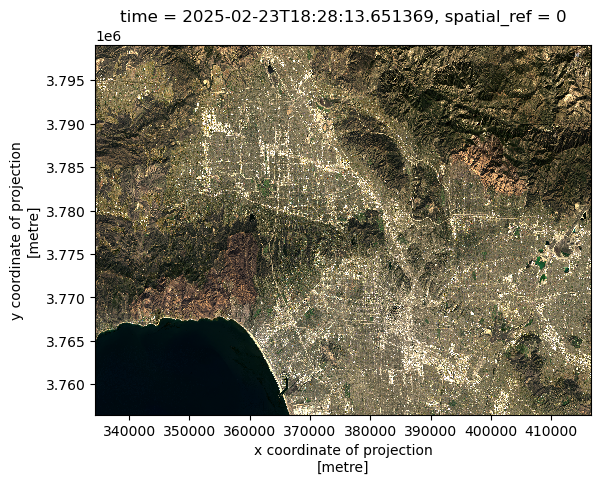

In [138]:
# 
palisades_eaton[["red", "green","blue"]].to_array().fillna(0).plot.imshow(robust = True)

In [143]:
np.isnan(palisades_eaton[["red", "green","blue"]]).sum()

<xarray.Dataset> Size: 40B
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0
Data variables:
    red          int64 8B 0
    green        int64 8B 1
    blue         int64 8B 109